In [9]:
import tensorflow as tf
import pathlib
# Putanja do osnovnog direktorija dataset-a
base_dir = pathlib.Path('test')

# Učitavanje podataka
batch_size = 32
img_height = 256
img_width = 256

# Skup podataka za treniranje
train_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    validation_split=0.3,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

# Skup podataka za validaciju
val_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    validation_split=0.3,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)


val_batches = tf.data.experimental.cardinality(val_ds)
test_ds = val_ds.take((2*val_batches) // 3)
val_ds = val_ds.skip((2*val_batches) // 3)

# Spremanje imena klasa
class_names = train_ds.class_names
print(class_names)
# normalizovati dataset
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names))  
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

epochs=10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)



Found 1983 files belonging to 21 classes.
Using 1389 files for training.
Found 1983 files belonging to 21 classes.
Using 594 files for validation.
['Earth', 'Jupiter', 'MakeMake', 'Mars', 'Mercury', 'Moon', 'Neptune', 'Pluto', 'Saturn', 'Uranus', 'Venus', 'callisto', 'deimos', 'enceladus', 'europa', 'ganymede', 'io', 'mimas', 'phobos', 'rhea', 'titan']
Epoch 1/10
44/44 [==============================] - 12s 229ms/step - loss: 1.3485 - accuracy: 0.5738 - val_loss: 70.5719 - val_accuracy: 0.7810
Epoch 2/10
44/44 [==============================] - 10s 219ms/step - loss: 0.4956 - accuracy: 0.8524 - val_loss: 86.7434 - val_accuracy: 0.7619
Epoch 3/10
44/44 [==============================] - 10s 221ms/step - loss: 0.2570 - accuracy: 0.9410 - val_loss: 100.1837 - val_accuracy: 0.8190
Epoch 4/10
44/44 [==============================] - 10s 219ms/step - loss: 0.2481 - accuracy: 0.9258 - val_loss: 86.9423 - val_accuracy: 0.8571
Epoch 5/10
44/44 [==============================] - 10s 221ms/step -

12/12 [==============================] - 1s 58ms/step


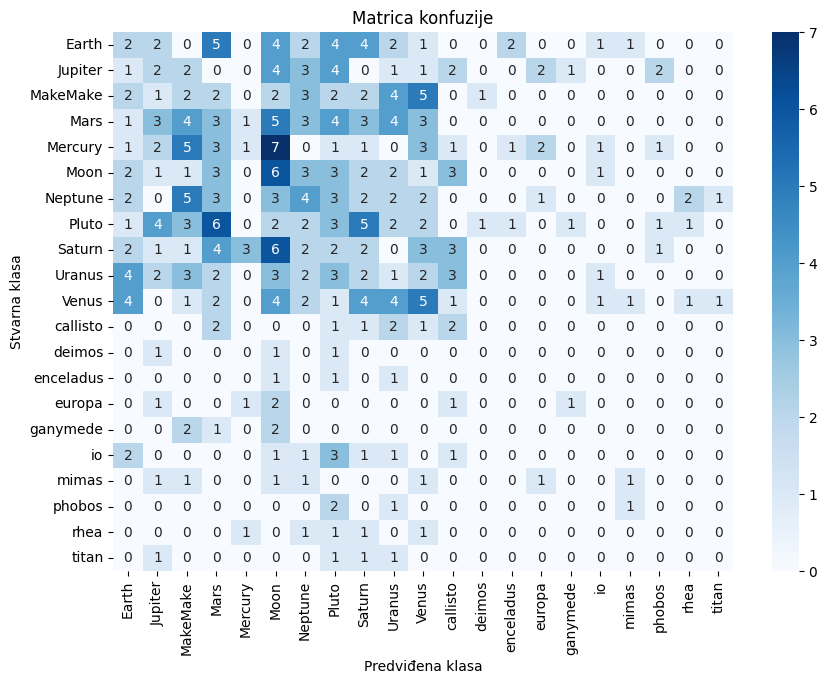

12/12 [==============================] - 1s 59ms/step - loss: 117.8253 - accuracy: 0.8594
Test accuracy: 0.859375
Test loss: 117.82532501220703


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
import numpy as np

# Predviđanja modela za test skup
predictions = np.argmax(model.predict(test_ds), axis=-1)

# Stvarne vrednosti za test skup
true_labels = np.concatenate([y for x, y in test_ds], axis=0)

# Izračunavanje matrice konfuzije
conf_matrix = confusion_matrix(true_labels, predictions)


# Kreiranje DataFrame-a za matricu konfuzije
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Prikaz matrice konfuzije 
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predviđena klasa')
plt.ylabel('Stvarna klasa')
plt.title('Matrica konfuzije')
plt.show()


# Evaluacija modela na test skupu
loss, accuracy = model.evaluate(test_ds)
print("Test accuracy:", accuracy)
print("Test loss:", loss)

1/1 [==============================] - 0s 36ms/step


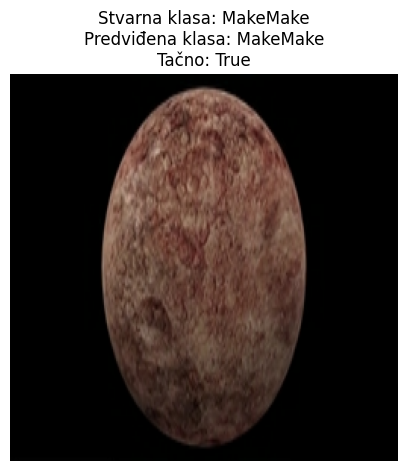

Stvarna klasa: MakeMake, Predviđena klasa: MakeMake, Tačno: True
1/1 [==============================] - 0s 30ms/step


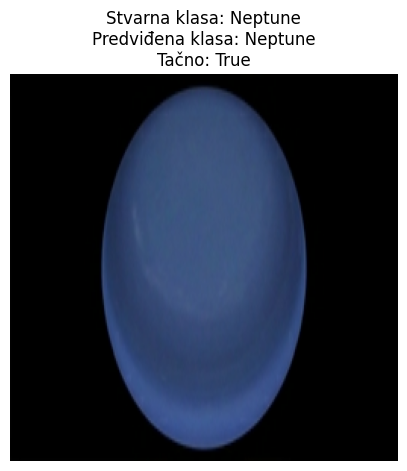

Stvarna klasa: Neptune, Predviđena klasa: Neptune, Tačno: True
1/1 [==============================] - 0s 30ms/step


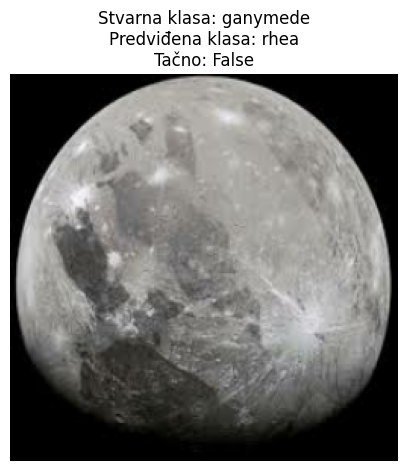

Stvarna klasa: ganymede, Predviđena klasa: rhea, Tačno: False
1/1 [==============================] - 0s 30ms/step


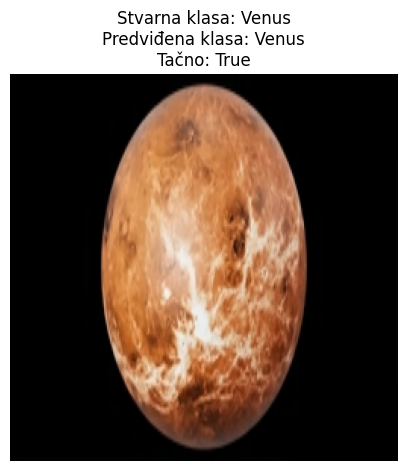

Stvarna klasa: Venus, Predviđena klasa: Venus, Tačno: True
1/1 [==============================] - 0s 34ms/step


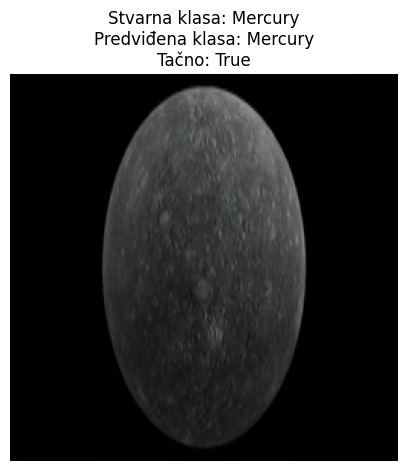

Stvarna klasa: Mercury, Predviđena klasa: Mercury, Tačno: True
1/1 [==============================] - 0s 31ms/step


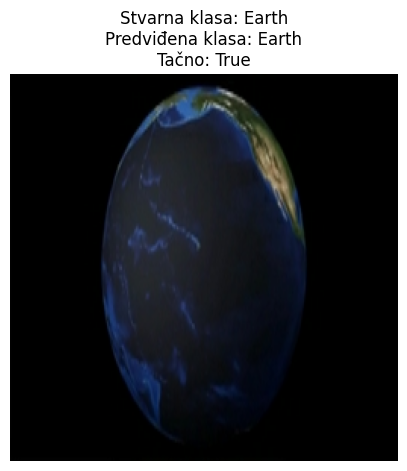

Stvarna klasa: Earth, Predviđena klasa: Earth, Tačno: True
1/1 [==============================] - 0s 31ms/step


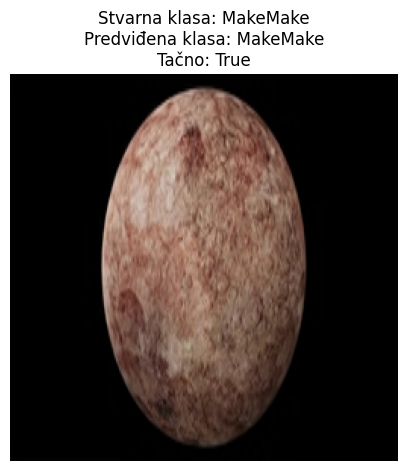

Stvarna klasa: MakeMake, Predviđena klasa: MakeMake, Tačno: True
1/1 [==============================] - 0s 31ms/step


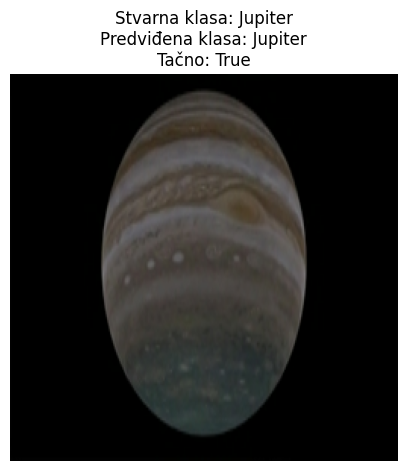

Stvarna klasa: Jupiter, Predviđena klasa: Jupiter, Tačno: True
1/1 [==============================] - 0s 32ms/step


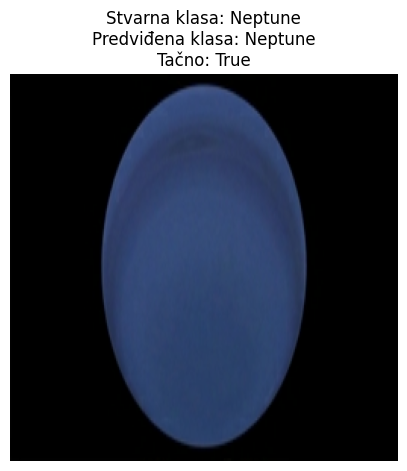

Stvarna klasa: Neptune, Predviđena klasa: Neptune, Tačno: True
1/1 [==============================] - 0s 31ms/step


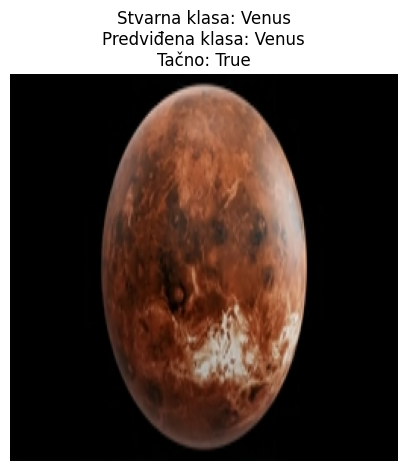

Stvarna klasa: Venus, Predviđena klasa: Venus, Tačno: True
Procenat tačnosti: 90.00%


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Pretvaranje test_ds u listu slika i oznaka
test_images = []
test_labels = []
for images, labels in test_ds.unbatch().take(30):  # Uzmite 300 slika za prikaz
    test_images.append(images.numpy())
    test_labels.append(labels.numpy())

# Izaberite 100 nasumičnih slika i njihove labele za prikaz
indices = np.random.choice(range(len(test_images)), 10, replace=False)

# Inicijalizacija brojača za tačna predviđanja i ukupan broj predviđanja
correct_predictions = 0
total_predictions = 0

for i in indices:
    img = test_images[i]
    true_label_index = test_labels[i]
    true_label = class_names[true_label_index]

    # Normalizacija slike za prikaz, ako je potrebno
    img_to_show = img
    if img_to_show.max() > 1.0:
        img_to_show = img_to_show / 255.0

    # Dodajte batch dimenziju i napravite predikciju
    img_array = np.expand_dims(img, axis=0)
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class = class_names[predicted_class_index]

    # Provera da li je predviđena klasa tačna
    is_correct = true_label == predicted_class
    if is_correct:
        correct_predictions += 1
    total_predictions += 1

    # Opciono: prikažite sliku, pravu klasu i predviđenu klasu
    plt.figure(figsize=(5, 6))
    plt.imshow(img_to_show)
    plt.title(f"Stvarna klasa: {true_label}\nPredviđena klasa: {predicted_class}\nTačno: {is_correct}")
    plt.axis('off')
    plt.show()

    print(f"Stvarna klasa: {true_label}, Predviđena klasa: {predicted_class}, Tačno: {is_correct}")

# Izračunavanje i prikazivanje procenta tačnosti
accuracy_percentage = (correct_predictions / total_predictions) * 100
print(f"Procenat tačnosti: {accuracy_percentage:.2f}%")
